<u>Классификация музыкальных жанров</u>

![](https://drive.google.com/uc?export=view&id=1oxjiju7OXlaWISbVY_Cv08NrJjAssl1y)

Датасет содержит различные характеристики музыкальных треков. Необходимо решить задачу классификации - предсказать жанр трека по представленным признакам.

Датасет содержит 17996 строк и 17 столбцов.

Целевой признак - музыкальный жанр Class:

**Rock, Indie, Alt, Pop, Metal, HipHop, Alt_Music, Blues, Acoustic/Folk, Country, Instrumental**.

Описание признаков:

| Поз. |  Имя признака | Описание |
| :-: | :-: | :- |
| 1. | **Artist name** | имя исполнителя | 
| 2. | **Track name** | название трека |
| 3. | **Popularity** | популярность, числовой признак, от 1 до 100 |
| 4. | **danceability** | танцевальность трека, от 0 до 1 |
| 5. | **energy** | энергичность трека, от 0 до 1 |
| 6. | **key** | тональность, категориальный |
| 7. | **loudness** | громкость, числовой признак, принимает как отрицательные, так и положительные значения |
| 8. | **mode** | бинарный признак, сложно восстановить исходное значение |
| 9. | **speechiness** | то, насколько понятна слушателю речь в треке, числовой признак |
| 10. | **acousticness** | отражает использование акустических инструментов, числовой признак |
| 11. | **instrumentalness** | отражает использование музыкальных инструментов в треке, числовой признак |
| 12. | **liveness** | вероятность того, что трек исполнялся вживую,  числовой признак, от 0 до 1 |
| 13. | **valence** | позитивность трека, от 0 до 1 |
| 14. | **tempo** | темп, принимает числовое значения больше 0 |
| 15. | **duration_in min/ms** | продолжительность трека в миллисекундах, числовой признак |
| 16. | **time_signature** | размер такта, категориальный |
| 17. | **Class** | целевая переменная, жанр музыки |

## **1. Загрузка и подготовка данных**

Импортируем библиотеки для работы с данными:

---



In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

Подготавливаем общие настройки для графиков:

---


In [2]:
sns.set(
    rc = {
        "figure.figsize": (10, 6), #размер графика - 12 дюймов в ширину, 8 в длину
        "axes.titlesize": 20, #размер заголовка 
        "axes.labelsize": 14, #размер подписей осей
        "xtick.labelsize": 13, #размер подписей чёрточек на x-оси
        "ytick.labelsize": 13, #размер подписей чёрточек на y-оси
    }
)

sns.set_style("whitegrid") #тема фона, белая со штриховкой

Импортируем датасет:

---

In [5]:
df=pd.read_csv('./train.csv',sep=',')

In [6]:
df.head(3)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.0171,NaN,0.0849,0.899,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.0011,0.004010,0.1010,0.569,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.4860,0.000196,0.3940,0.787,147.681,109667.0,4,6


In [7]:
df.shape

(17996, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [9]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


Заменим объектный тип на специальный категориальный:

---

In [10]:
df['Artist Name'] = df['Artist Name'].astype('category')
df['Track Name'] = df['Track Name'].astype('category')

In [11]:
df.describe(include=['category'])

,Artist Name,Track Name
count,17996,17996
unique,9149,15129
top,Backstreet Boys,Dreams
freq,69,9


Удалим столбецы Artist Name и Track Name из-за большого количества уникальных значений и предположительно малого влияния на результат предсказания класса

In [12]:
df=df.drop(columns='Artist Name')
df=df.drop(columns='Track Name')

Посмотрим имена признаков:

---

In [13]:
df.columns

Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

Посмотрим количество пустых значений по столбцам:

---

In [14]:
df.isnull().sum()

Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

Создадим списки из категориальных и числовых признаков:

---

In [15]:
num_cols=[
    'Popularity',
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_in min/ms'

]
cat_cols=[
    'mode',
    'key',
    'time_signature'
]

In [16]:
feature_cols = num_cols + cat_cols

Заменим пропуски медианой

---

In [17]:
df["key"] = df['key'].fillna(df['key'].median(axis = 0), axis = 0)

In [18]:
df["Popularity"] = df['Popularity'].fillna(df['Popularity'].median(axis = 0), axis = 0)

In [19]:
df["instrumentalness"] = df['instrumentalness'].fillna(df['instrumentalness'].median(axis = 0), axis = 0)

In [20]:
df.isnull().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

Заменим тип данных категориальных признаков на category:

---

In [21]:
df['key']=df['key'].astype('int64')
df[cat_cols]=df[cat_cols].astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Popularity          17996 non-null  float64 
 1   danceability        17996 non-null  float64 
 2   energy              17996 non-null  float64 
 3   key                 17996 non-null  category
 4   loudness            17996 non-null  float64 
 5   mode                17996 non-null  category
 6   speechiness         17996 non-null  float64 
 7   acousticness        17996 non-null  float64 
 8   instrumentalness    17996 non-null  float64 
 9   liveness            17996 non-null  float64 
 10  valence             17996 non-null  float64 
 11  tempo               17996 non-null  float64 
 12  duration_in min/ms  17996 non-null  float64 
 13  time_signature      17996 non-null  category
 14  Class               17996 non-null  int64   
dtypes: category(3), float64(11), int64(1

In [23]:
df.describe(include=['category'])

,key,mode,time_signature
count,17996,17996,17996
unique,11,2,4
top,6,1,4
freq,3204,11459,16451


## **2. Визуализация данных**

Распределение по классам:

---

In [24]:
i_mass =[]
per_mass = []
for i in range (11):
    count_no_class = len(df[df['Class']!=i])
    count_class = len(df[df['Class']==i])
    pct = count_class/(count_no_class + count_class)
    print(i, pct*100)
    i_mass.append (i)
    per_mass.append (pct*100)

0 3.4729939986663703
1 7.6294732162702825
2 7.068237386085798
3 2.2338297399422093
4 2.1504778839742165
5 8.04067570571238
6 14.37541675927984
7 3.200711269170927
8 10.302289397643921
9 14.02533896421427
10 27.500555679039785


Распределение по классам с названиями жанров:

---


In [25]:
class_name = ["Rock", "Indie", "Alt", "Pop", "Metal", "HipHop", "Alt_Music", "Blues", "Acoustic/Folk", "Instrumental", "Country", "Bollywood"]
class_number = []
class_number = df['Class']
class_mapping = { i : class_name[i] for i in range(0,11)} #Class mapping
class_number = class_number.map(class_mapping)
class_number.value_counts()

Country          4949
Alt_Music        2587
Instrumental     2524
Acoustic/Folk    1854
HipHop           1447
Indie            1373
Alt              1272
Rock              625
Blues             576
Pop               402
Metal             387
Name: Class, dtype: int64

Визуализация распределения по классам:

---

<AxesSubplot:>

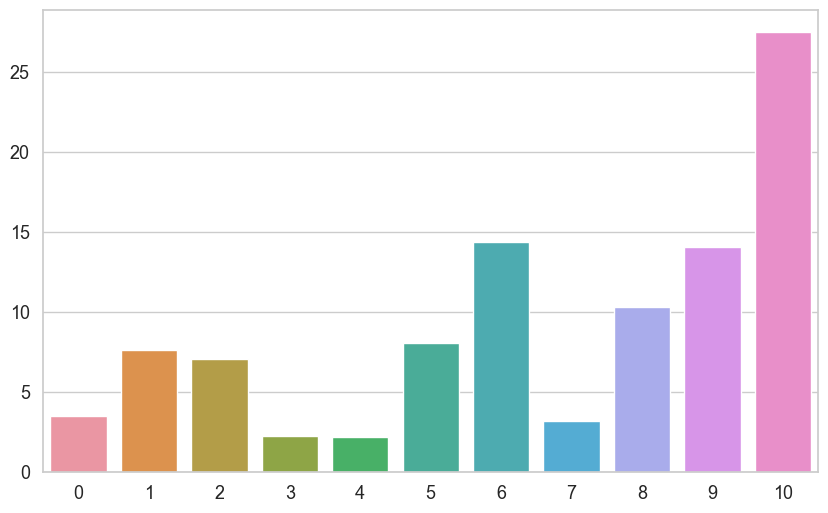

In [26]:
sns.barplot(i_mass, per_mass)

([<matplotlib.patches.Wedge at 0x281487acc40>,
 [Text(0.714378271028979, 0.8364590162594021, '10'),
  Text(-0.6290100411264601, 0.902411418457285, '6'),
  Text(-1.0973192628988189, 0.07674917114336272, '9'),
  Text(-0.8452489824464342, -0.7039560765227245, '8'),
  Text(-0.3251655259895507, -1.0508412728418783, '5'),
  Text(0.21012447371775286, -1.0797442778476938, '1'),
  Text(0.6691550578141721, -0.8730587085653015, '2'),
  Text(0.9166651188154034, -0.6080502116989539, '0'),
  Text(1.0231438818649357, -0.4039512309702136, '7'),
  Text(1.0769006837341026, -0.2242429873441358, '3'),
  Text(1.0974906173793233, -0.07425863427475475, '4')],
 [Text(0.3896608751067158, 0.45625037250512834, '27.5%'),
  Text(-0.3430963860689782, 0.49222441006761, '14.4%'),
  Text(-0.598537779762992, 0.04186318426001603, '14.0%'),
  Text(-0.46104489951623673, -0.3839760417396679, '10.3%'),
  Text(-0.17736301417611855, -0.5731861488228427, '8.0%'),
  Text(0.11461334930059244, -0.5889514242805601, '7.6%'),
  Text

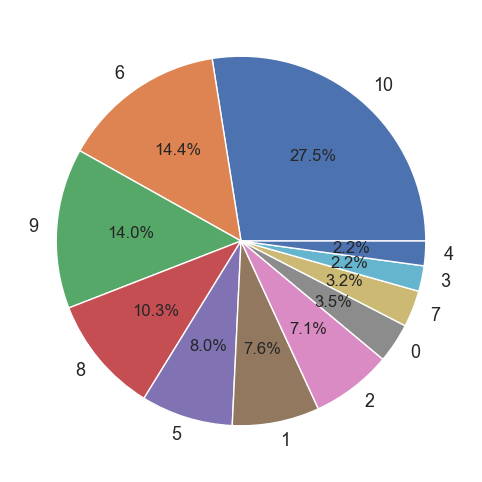

In [27]:
plt.pie(df['Class'].value_counts(), labels = df['Class'].value_counts().index, autopct = '%1.1f%%')

Посмотрим зависимости от признаков:

---

In [ ]:
sns.pairplot(df, hue = 'Class')

Визуализация числовых признаков:

---

In [ ]:
df.hist(column = num_cols, figsize = (14, 14))

Фичи Popularity, danceability, loudness, valence, tempo, duration_in min/ms имеют форму нормального распределения. 

In [ ]:
fig = plt.figure(figsize = (15, 15))
for i in range(len(cat_cols)):
    train_counts = df[cat_cols[i]].value_counts()
    plt.subplot(4, 4, i + 1)
    plt.pie(train_counts, labels = train_counts.index, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(cat_cols[i], loc = "right")
    plt.legend()

90% значений time_signature равны 4, что может плохо сказаться на обучении, может понадобиться удаление колонки

In [ ]:
sns.boxplot(df['instrumentalness'])

In [ ]:
df.quantile([0.001,0.005,.01,.05,.1,.5,.9,.95,.99,.995,0.999])

Очень сильных выбросов нет

Построим корреляционную матрицу:

---

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))

sns.heatmap(df.corr(), square = True, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')

## **3. Обучающая и тестовая выборки**


Разделим признаки и целевую переменную:

---

In [ ]:
y = df['Class']

Удалим часть признаков:

---

In [ ]:
X = df.drop(columns = ['key', 'mode','time_signature', 'Class'])
X.info()

Разделим датасет на обучающую и тестовую выборки:

---

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 49)

Применим one-hot encoding к категориальным признакам:

---

In [ ]:
X_train.shape

In [ ]:
y_train.size

In [ ]:
y_train

In [ ]:
y_test

Проведем масштабирование количественных признаков:

---

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns, index = X_train.index)

In [ ]:
X_train

Проведем предобработку тестовой выборки:

---

In [ ]:
#X_test = pd.get_dummies(X_test, columns = cat_cols)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

In [ ]:
X_test

In [ ]:
y_test

## **4. Обучение моделей**

### Обучение 1. K Ближайших Соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Обучаем модель:

---

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=10)
KNN_model.fit(X_train, y_train)

Предсказываем:

---

In [ ]:
y_train_predict = KNN_model.predict(X_train)
y_test_predict  = KNN_model.predict(X_test)

In [ ]:
print('Accuracy of KNN on test set: {:.2f}'.format(KNN_model.score(X_test, y_test)))
print('Accuracy of KNN on train set: {:.2f}'.format(KNN_model.score(X_train, y_train)))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_test_predict))

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, KNN_model.predict_proba(X_test))

Матрица ошибок:

---

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

### Обучение 2. Метод опорных векторов

In [ ]:
from sklearn.svm import SVC

Обучаем модель:

---

In [ ]:
SVC_model = SVC()
SVC_model.fit(X_train, y_train)

Предсказываем:

---

In [ ]:
y_train_pr = SVC_model.predict(X_train)
y_test_pr  = SVC_model.predict(X_test)

In [ ]:
print('Accuracy of SVC on test set: {:.2f}'.format(SVC_model.score(X_test, y_test)))
print('Accuracy of SVC on train set: {:.2f}'.format(SVC_model.score(X_train, y_train)))

In [ ]:
print(classification_report(y_test, y_test_pr))

Матрица ошибок:

---

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_pr)
MSE_test  = mean_squared_error(y_test,  y_test_pr)
R2_train = r2_score(y_train, y_train_pr)
R2_test  = r2_score(y_test,  y_test_pr)

MSE_train, MSE_test, R2_train, R2_test

### Обучение 3. Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

Обучаем модель:

---

In [ ]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

Предсказываем:

---

In [ ]:
y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

In [ ]:
print(classification_report(y_test, y_test_pred))

In [ ]:
log_loss(y_test, logreg.predict_proba(X_test))

Матрица ошибок:

---


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test,  y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
R2_test  = r2_score(y_test,  y_test_pred)

MSE_train, MSE_test, R2_train, R2_test

### Обучение 4. Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Обучаем модель:

---

In [ ]:
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)

Предсказываем:

---

In [ ]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))
print('Accuracy of decision tree classifier on train set: {:.2f}'.format(model.score(X_train, y_train)))

In [ ]:
print(classification_report(y_test, y_test_pred))

In [ ]:
log_loss(y_test, model.predict_proba(X_test))

Матрица ошибок:

---

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test,  y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
R2_test  = r2_score(y_test,  y_test_pred)

MSE_train, MSE_test, R2_train, R2_test

### Обучение 5. Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

Обучаем модель:

---


In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

Предсказываем:

---

In [ ]:
y_test_pred = linreg.predict(X_test)
y_train_pred = linreg.predict(X_train)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))
print('Accuracy of linear regression classifier on train set: {:.2f}'.format(linreg.score(X_train, y_train)))

Матрица ошибок:

---

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test,  y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
R2_test  = r2_score(y_test,  y_test_pred)

MSE_train, MSE_test, R2_train, R2_test

### Обучение 6. Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Обучаем модель:

---

In [ ]:
rfc = RandomForestClassifier(max_depth = 9, random_state = 3)
rfc.fit(X_train, y_train)

Предсказываем:

---

In [ ]:
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))
print('Accuracy of random forest classifier on train set: {:.2f}'.format(rfc.score(X_train, y_train)))

In [ ]:
print(classification_report(y_test, y_test_pred))

In [ ]:
log_loss(y_test, rfc.predict_proba(X_test))

Матрица ошибок:

---

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test,  y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
R2_test  = r2_score(y_test,  y_test_pred)

MSE_train, MSE_test, R2_train, R2_test

### Обучение 7. Ансамбль моделей



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

Обучаем модель:

---

In [ ]:
mod1 = GradientBoostingClassifier(warm_start = True, n_estimators = 333, learning_rate = 0.9, max_depth = 5, random_state = 7)
mod2 = RandomForestClassifier(max_depth = 8, random_state = 3)
mod3 = ExtraTreesClassifier(n_estimators = 10, max_depth = 5, random_state = 3)
mod4 = HistGradientBoostingClassifier(max_iter = 10, max_depth = 5)

In [ ]:
ereg = VotingClassifier(estimators=[('gb', mod1), ('rf', mod2), ('et', mod3), ('hgb', mod4)])

In [ ]:
ereg.fit(X_train, y_train)

Предсказываем:

---

In [ ]:
y_test_pred = ereg.predict(X_test)
y_train_pred = ereg.predict(X_train)
print('Accuracy of voting classifier on test set: {:.2f}'.format(ereg.score(X_test, y_test)))
print('Accuracy of voting classifier on train set: {:.2f}'.format(ereg.score(X_train, y_train)))

In [ ]:
print(classification_report(y_test, y_test_pred))

Матрица ошибок:

---

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test,  y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
R2_test  = r2_score(y_test,  y_test_pred)

MSE_train, MSE_test, R2_train, R2_test

## **5. Итог**

Сравнение моделей:

|  Поз. |  Модель | MSE_test |
| :-: | :-: | :-: |
| 1. | K Ближайших Соседей | 13.68 |
| 2. | Метод опорных векторов | 12.96 |
| 3. | Логистическая регрессия | 13.62 |
| 4. | Дерево решений | 13.99 |
| 5. | **Линейная регрессия** | **9.34** |
| 6. | Случайный лес | 13.37 |
| 7. | Ансамбль моделей | 15.21 |